# Predicting Solar Power Output Using Linear Regression

### Objective

To implement solar power output prediction using Linear Regression, a general approach to how you can tackle the solar power output prediction problem using linear regression, along with a sample implementation using Python and common libraries like Pandas, Scikit-learn, and Matplotlib.   The model will be trained on historical data and will predict the solar power output for given values of the input features. The performance of the model will be evaluated using standard metrics such as Mean Squared Error (MSE) and R-squared (R²).

### Problem

The global shift towards sustainable energy has led to an increasing reliance on renewable energy sources such as solar power. Accurate predictions of solar power output are crucial for effective grid management, energy storage, and optimizing the use of solar energy. we aim to predict the solar power output based on certain environmental factors, which include temperature, humidity, solar_irradiance and  wind_speed. The goal is to develop a predictive model using Linear Regression, a simple yet powerful algorithm, to estimate the solar power output from these features. 

### Solution

To predict solar power output using linear regression and save the model, we'll go through the following steps:
1.	Import required libraries
2.	Prepare the dataset
    1.	Load dataset 
    2.	Select Features and target variable
3.	Train a linear regression model
    1.	Split the dataset into training and testing sets (80% train, 20% test)
    2.	Initialize and train the linear regression model
4.	Evaluate the model
    1.	Predicting the solar power output on the test set
    2.	Evaluate the model performance
5.	Visualization 
6.	Save the model for later use
7.	Load and use the Model



### Procedures

1. Import required libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

2. Prepare the dataset

Features:
- temperature: in the range of 10-35°C to represent different climates.
- humidity: In between 20% and 100% as humidity varies across regions.
- solar irradiance: In between 100 W/m² and 10	00 W/m² (typical range for solar radiation).
- windspeed: In between 0 m/s and 10 m/s, representing wind conditions.

**Target Variable (solar_power_output):** This is calculated as a function of the other features, with random noise added to make the data more realistic. The relationship assumes that higher irradiance and temperature increase power output, while high humidity reduces efficiency. Wind speed has a small positive impact.


2.1 Load Dataset


In [ ]:
df = pd.read_csv(r"dataset\solar_power_output.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset\\solar_power_output.csv'

2.2 Select Features and target variable 

In [ ]:
# Features and target variable
X = df[['temperature' ,'humidity' ,'solar_irradiance' , 'wind_speed' ]]
y = df['solar_power_output' ]

3. Train a linear regression model

Now, we’ll split the dataset into training and testing sets, train the linear regression model, and evaluate its performance. 


3.1 Split the dataset into training and testing sets (80% train, 20% test) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.2 Initialize and train the linear regression model 

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


4. Evaluate the model

We will now predict the solar power output using the test data and evaluate the performance using metrics like Mean Squared Error (MSE) and R-squared (R²). 


4.1 Predicting the solar power output on the test set

In [ ]:
# Predicting the solar power output on the test set
y_pred = model.predict(X_test)

Predicted outputs of test dataset,

In [ ]:
y_pred

array([144.96384898,  58.11610732, 161.4374932 , 389.14991241,
       498.25281072, 201.87825737, 281.98043895, 345.23928089,
       209.8153007 , 274.03276031, 270.54161059,  70.67019926,
       430.34825639, 475.64948894, 131.59116845, 486.95165555,
       351.08240783,  66.735505  , 287.19941743, 313.7561303 ,
       157.07369432, 218.20762546, 328.5325746 , 455.81467159,
       223.19665447, 343.43329478, 258.86018406, 253.40618323,
       486.62802217, 489.19150746, 350.8033731 , 139.95460117,
       486.99264992, 167.10118788, 443.31106565, 498.8952409 ,
       441.2052601 , 183.54584536, 499.25138523, 238.26085128,
       345.91260988, 281.0214324 , 215.14873338, 472.26927744,
       104.37748831, 356.23344324, 133.46336312, 494.99140066,
       471.9887192 , 466.48855407,  69.02645868, 335.04932651,
       273.44757046, 142.79208215, 329.77580885, 208.05375984,
       433.23642612, 462.47570168, 270.1894354 , 148.38377673,
       321.90726446, 189.87685415, 148.81628478,  52.65

In [ ]:
model.intercept_

0.010596780972093711

In [ ]:
model.coef_

array([0.50053615])

In [ ]:
# y = x*model.coef_ + model.intercept_

4.2 Evaluate the model performance

In [ ]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 32.33319189996614
R-squared: 0.9981624336592926


5. Visualization

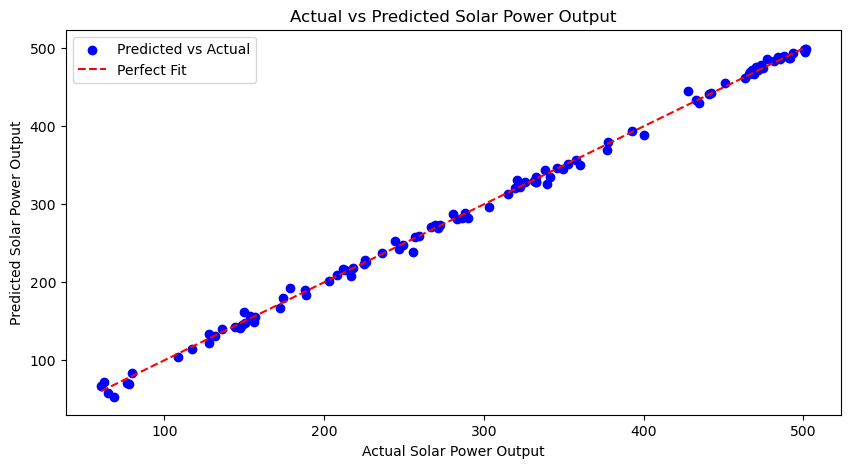

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
# Diagonal line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Solar Power Output")
plt.ylabel("Predicted Solar Power Output")
plt.title("Actual vs Predicted Solar Power Output")
plt.legend()
plt.show()

- Each blue dot represents a comparison between an actual and predicted value.
- The red dashed line represents a perfect fit line, where predicted values would exactly match actual values if the model were perfect.
- The closer the points are to this line, the better the model's accuracy. 


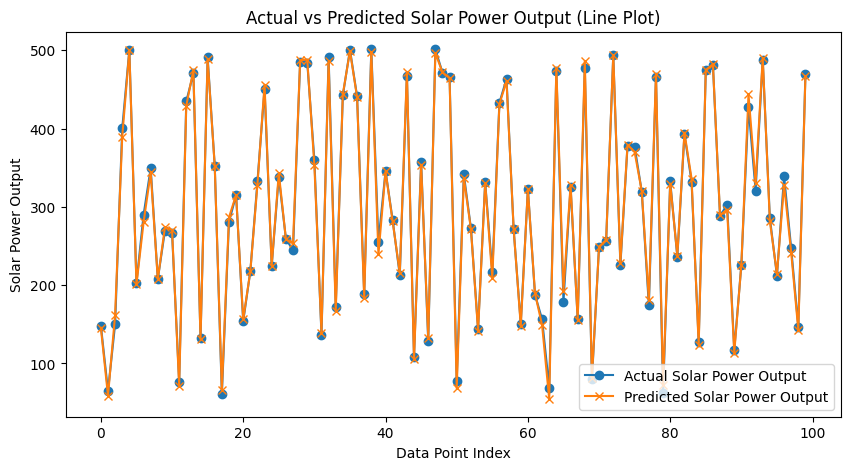

In [ ]:
# Line plot to show predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label="Actual Solar Power Output", marker='o')
plt.plot(range(len(y_test)), y_pred, label="Predicted Solar Power Output", marker='x')
plt.xlabel("Data Point Index")
plt.ylabel("Solar Power Output")
plt.title("Actual vs Predicted Solar Power Output (Line Plot)")
plt.legend()
plt.show()

- Plots both actual and predicted solar power outputs for each test data point index.
- Helps visualize how predictions follow (or deviate from) the actual trend across the dataset. 


6. Save the model for later use

In [ ]:
import joblib
# Save the trained model
joblib.dump(model, 'solar_power_prediction_model.pkl')

['solar_power_prediction_model.pkl']

7. Load and use the Model 

In [ ]:
# Load the saved model
model = joblib.load(r"solar_power_prediction_model.pkl")

# New input data for prediction
# Example input (temperature, humidity, solar_irradiance,wind_speed)
new_data = np.array([[266.61]]) #19.36, 75.85,,5.19

# Predict solar power output
predicted_output = model.predict(new_data)
print(f"Predicted Solar Power Output: {predicted_output[0]} watts")

Predicted Solar Power Output: 133.4585399753478 watts


D:\edunet_foundation\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
